https://machinelearningmastery.com/save-load-keras-deep-learning-models/

In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
SYMB='AAPL'
TEST_DATA_PCT=0.65
BACK_TEST_DAYS=60

In [3]:
from datetime import datetime, timedelta
YDAY=datetime.strftime(datetime.now() - timedelta(1), '%Y-%m-%d')
TDAY=datetime.strftime(datetime.now(), '%Y-%m-%d')

In [4]:
df = web.DataReader(SYMB, data_source='yahoo', start='2012-01-01', end=YDAY)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732142,14.607142,14.621428,14.686786,302220800.0,12.691425
2012-01-04,14.810000,14.617143,14.642858,14.765715,260022000.0,12.759631
2012-01-05,14.948215,14.738214,14.819643,14.929643,271269600.0,12.901293
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,13.036158
2012-01-09,15.276786,15.048214,15.196428,15.061786,394024400.0,13.015480
...,...,...,...,...,...,...
2020-10-21,118.709999,116.449997,116.669998,116.870003,89946000.0,116.870003
2020-10-22,118.040001,114.589996,117.449997,115.750000,101988000.0,115.750000
2020-10-23,116.550003,114.279999,116.389999,115.040001,82572600.0,115.040001


In [5]:
df.shape

(2220, 6)

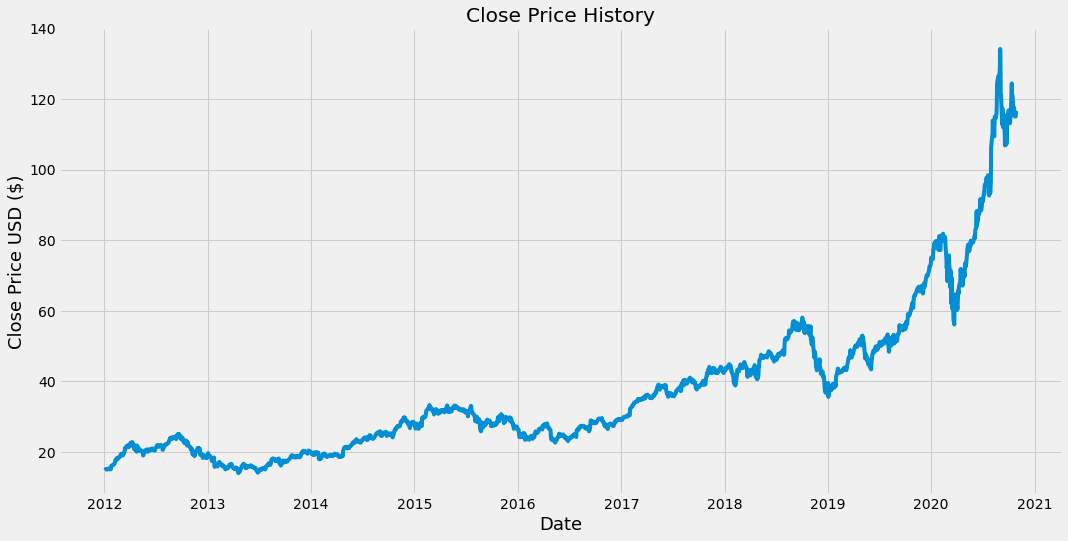

In [6]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [7]:
# Create new dataframe with only the 'Close column'

In [8]:
df.filter(['Close'])

,Close
Date,
2012-01-03,14.686786
2012-01-04,14.765715
2012-01-05,14.929643
2012-01-06,15.085714
2012-01-09,15.061786
...,...
2020-10-21,116.870003
2020-10-22,115.750000
2020-10-23,115.040001


In [9]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * TEST_DATA_PCT)

training_data_len

1443

In [10]:
# Scale the data

In [11]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data


array([[0.0061488 ],
       [0.00680527],
       [0.00816869],
       ...,
       [0.84080849],
       [0.84089168],
       [0.85378333]])

In [12]:
# Create the training data set

In [13]:
train_data = scaled_data[0:training_data_len, :]

# Split the data into x_train and y_train data sets

x_train = []
y_train = []

for i in range(BACK_TEST_DAYS, len(train_data)):
    x_train.append(train_data[i-BACK_TEST_DAYS:i, 0])
    y_train.append(train_data[i, 0])
    if i <= BACK_TEST_DAYS:
        print(x_train)
        print(y_train)
        print()
    

[array([0.0061488 , 0.00680527, 0.00816869, 0.00946678, 0.00926776,
       0.00971629, 0.00951133, 0.00916676, 0.00869744, 0.01014998,
       0.01145994, 0.01105596, 0.00884299, 0.01095496, 0.00887566,
       0.01667305, 0.01607005, 0.01685722, 0.01855928, 0.01959001,
       0.01950387, 0.01918604, 0.02054056, 0.02181487, 0.02325851,
       0.0255903 , 0.03048855, 0.03056281, 0.03328967, 0.03532738,
       0.03182524, 0.03317382, 0.03314709, 0.03692846, 0.0363908 ,
       0.03738589, 0.0391741 , 0.0401692 , 0.04303567, 0.04512389,
       0.04572687, 0.04593778, 0.04236733, 0.04150589, 0.04163362,
       0.04499021, 0.04593482, 0.04796361, 0.05274602, 0.05912652,
       0.0579324 , 0.05793537, 0.06254846, 0.06399208, 0.06296431,
       0.06202567, 0.06104839, 0.06429507, 0.06652291, 0.06745562])]
[0.06515055661523342]



In [14]:
# Convert x_train and y_train to numpy arrays

In [15]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [16]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1383, 60, 1)

In [17]:
# Build LSTM model
model = Sequential()

In [18]:
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [19]:
# Compile the model
#model.compile(optimizer='adam', loss='mean_squared_error')
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [20]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1383/1383 [==============================] - 106s 77ms/step - loss: 0.2981 - accuracy: 7.2307e-04


In [21]:
# Create the testing data set
#Create new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - BACK_TEST_DAYS:, :]
# Create the data set x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(BACK_TEST_DAYS, len(test_data)):
    x_test.append(test_data[i-BACK_TEST_DAYS:i, 0])


In [22]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [23]:
# Convert the data to numpy array
x_test = np.array(x_test)

In [24]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [25]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [26]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test)**2)
rmse

0.4357765178115825

/export/home/avani/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


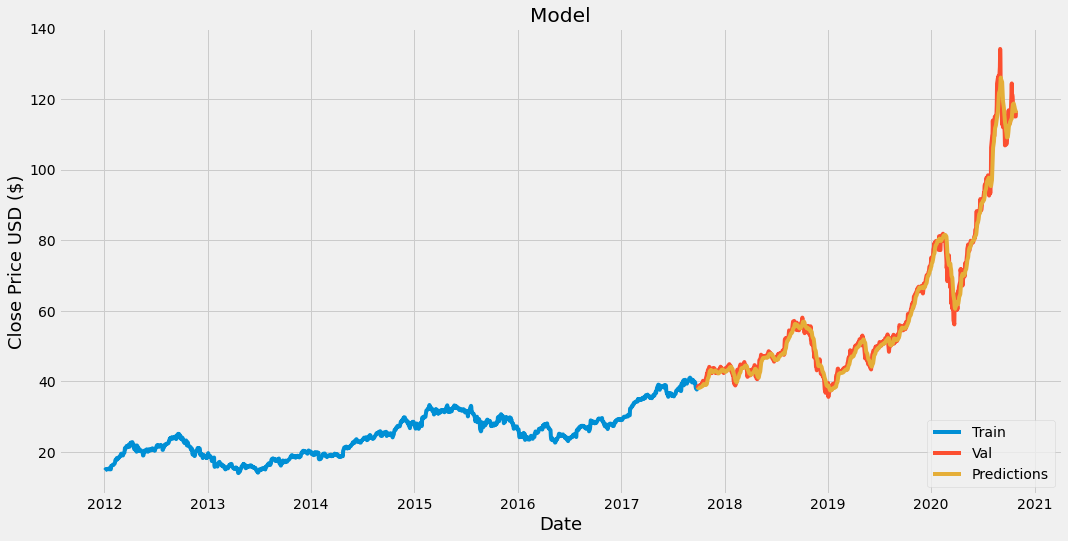

In [27]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visual
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()



In [28]:
# Show the valid and redicted prices
valid

,Close,Predictions
Date,,
2017-09-27,38.557499,38.264774
2017-09-28,38.320000,38.160492
2017-09-29,38.529999,38.092556
2017-10-02,38.452499,38.079765
2017-10-03,38.619999,38.082222
...,...,...
2020-10-21,116.870003,118.058929
2020-10-22,115.750000,117.676598
2020-10-23,115.040001,117.162636


In [29]:
# Get the quote
apple_quote = web.DataReader(SYMB, data_source='yahoo', start='2012-01-01', end=TDAY)

# Create a new dataframe
new_df = apple_quote.filter(['Close'])

# Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[(-1)*BACK_TEST_DAYS:].values

# Scale data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

# Create empty list
X_test = []

# Append the past 60 days
X_test.append(last_60_days_scaled)

# Convert X_test data set to a numpy array
X_test = np.array(X_test)

# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get predicted scaled price
pred_price = model.predict(X_test)

# Undo scaling
pred_price = scaler.inverse_transform(pred_price)

print(pred_price)

[[115.747925]]


In [30]:
# Get the quote
#apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end='2019-12-18')
#print(apple_quote2['Close'])